<a id='intro'></a>
# Project 1: Appointment no show data analysis.
## Introduction

### Dataset Description 
This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.

1. ‘ScheduledDay’ tells us on what day the patient set up their appointment.
2. ‘Neighborhood’ indicates the location of the hospital.
3. ‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.
4. 'age’ indicates the age of patient
5. ‘No-show’ indicates ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.
6. ‘SMS_received’ indicate if the patients have received SMS massage before their appointment
7. ‘Gender’ Male Or Female
8. ‘Hipertension’ true or false
9. ‘Diabetes’ true or false
10. ‘Alcoholism’ true or false
11. ‘Handcap’ true or false
12. The last column: says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.

### Question(s) for Analysis
1. What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?

In [1]:
#imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

    100% |████████████████████████████████| 10.5MB 3.9MB/s eta 0:00:01   12% |████▏                           | 1.4MB 27.5MB/s eta 0:00:01    54% |█████████████████▎              | 5.7MB 26.0MB/s eta 0:00:01
    100% |████████████████████████████████| 13.4MB 2.9MB/s eta 0:00:01   12% |████                            | 1.7MB 25.3MB/s eta 0:00:01    22% |███████▎                        | 3.0MB 23.8MB/s eta 0:00:01    43% |█████████████▊                  | 5.8MB 28.4MB/s eta 0:00:01
tensorflow 1.3.0 requires tensorflow-tensorboard<0.2.0,>=0.1.0, which is not installed.
  Found existing installation: numpy 1.12.1
    Uninstalling numpy-1.12.1:
      Successfully uninstalled numpy-1.12.1
  Found existing installation: pandas 0.23.3
    Uninstalling pandas-0.23.3:
      Successfully uninstalled pandas-0.23.3


<a id='wrangling'></a>
## Data Wrangling


In [2]:
#reading the csv data to a dataframe
df = pd.read_csv('Database_No_show_appointments/noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


>Checking the number of rows, columns, and their datatypes. And columns with missing values. 

In [3]:
#showing some summary information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


>check for duplicates

In [4]:
df.duplicated().sum() #sum method adds the number of duplicated rows found

0

>Checking unique values of each column

In [5]:
#returns the number of unique values in the dataset columns
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

>We have some duplicated data by patient id.

In [ ]:
# Lets check how many rows are there compared to no show.
df[['PatientId', 'No-show']].duplicated().sum()

>The Handcap column has values 2 to 4. Whereas it should have 1 and 0 to represent True and False respectively. i.e. whether the patient is handicap or not.

In [ ]:
#lets check what other values are in the handicap column
df['Handcap'].value_counts()

>Checking the age column.
We have a weird value i.e -1.

In [ ]:
#checking value of age column which is less than 0
df[df['Age'] < 0]


### Data Cleaning
 

>Change the rows values handcap 2, 3 and 4 to 1 for consistency.

In [ ]:
#replacing values of the handicap column which are not 1 or 0
df['Handcap'].replace(2, 1, inplace=True)
df['Handcap'].replace(3, 1, inplace=True)
df['Handcap'].replace(4, 1, inplace=True)

In [ ]:
#confirm changes
df['Handcap'].unique()

>Drop the row with age is -1

In [ ]:
#get the index of the row
row = df.query('Age == -1').index[0]
df.drop(row, axis=0, inplace=True)

In [ ]:
#confirm the row was removed
df.query('Age == -1')

>Lets drop the duplicated rows by patient id and no show.

In [ ]:
#removing the duplicated rows
df.drop_duplicates(['PatientId', 'No-show'], inplace=True)

In [ ]:
#confirm they have been removed
df.shape

>Removing columns that will not be used in analysis

In [ ]:
#making a list of columns that will not be used in analysis
columns = ['PatientId', 'AppointmentID', 'ScheduledDay', 'AppointmentDay']
df.drop(columns=columns, axis=1, inplace=True)

In [ ]:
#confirm if columns have been dropped
df.head(1)

>Check for rows and columns with empty values. Drop the rows if they can not be filled with mean.

>Dataset has no empty values.

In [ ]:
#checking if we have any null values
df.isnull().sum()

>Rename columns for consistency.

In [ ]:
#a list of new column names
names = ['gender', 'age', 'neighbourhood', 'scholarship', 
         'hypertension', 'diabetes', 'alcoholism', 'handicap', 'sms_received', 'no_show']
# setting the new column names
df.columns = names

In [ ]:
#confirm names have been updated
df.head(1)

<a id='eda'></a>
## Exploratory Data Analysis


### Q1. What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?

#### a. Checking for a relationship between no-show and scholarship

Ans: We can see that there is a very small difference between having a scholarship and showing up or not.

In [20]:
# Get the rates of 'no_show' values for each unique value of the 'scholarship' column
schol_show = df.groupby('scholarship')['no_show'].value_counts(normalize=True)

#calculating the difference between scholarship no show no and yes
sch_show_no = schol_show[0][0] - schol_show[1][0]
sch_show_yes = schol_show[0][1] - schol_show[1][1]

print(sch_show_no, sch_show_yes)

0.03666906234716705 -0.0366690623471671


In [21]:
#a function to be used for plotting graphs
def plot_graphs(data, kind, xlabel, ylabel, title):
    '''
    takes in data with can be either a df or points
    kind - type of graph to plot e.g bar, scatter
    xlabel and ylabel - x axis and y axis name respectively
    title - name of the graph
    '''
    
    data.plot(kind=kind)
    plt.xlabel(xlabel, fontsize=18)
    plt.ylabel(ylabel, fontsize=18)
    plt.title(title)
    plt.figure(figsize=(20,15))
    plt.show()

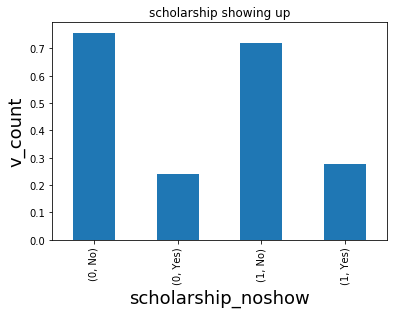

In [22]:
#ploting the scholarship vs no show graph
plot_graphs(schol_show, 'bar', 'scholarship_noshow', 'v_count', 'scholarship showing up')

#### b. How does the diseases affect showing up for an appointment?

>Getting individual count totals of people with diseases.

In [23]:
hyp0 = df.query('hypertension == 0')['no_show'].value_counts()
hyp1 = df.query('hypertension == 1')['no_show'].value_counts()

In [24]:
dia0 = df.query('diabetes == 0')['no_show'].value_counts()
dia1 = df.query('diabetes == 1')['no_show'].value_counts()

In [25]:
alc0 = df.query('alcoholism == 0')['no_show'].value_counts()
alc1 = df.query('alcoholism == 1')['no_show'].value_counts()

In [26]:
hand0 = df.query('handicap == 0')['no_show'].value_counts()
hand1 = df.query('handicap == 1')['no_show'].value_counts()

>A large number of patient does not have diseases in the dataset. We can see from the df below that those with disease tend to show up for appointment.

In [27]:
#make a dataframe containing all diseases counts
df_disease = pd.DataFrame({'hyp0': hyp0, 'dia0': dia0, 'alc0': alc0, 'hand0': hand0,
                           'hyp1': hyp1, 'dia1': dia1, 'alc1': alc1, 'hand1': hand1})
df_disease

,hyp0,dia0,alc0,hand0,hyp1,dia1,alc1,hand1
No,43163,50207,52875,53126,10990,3946,1278,1027
Yes,14644,16513,17143,17385,3019,1150,520,278


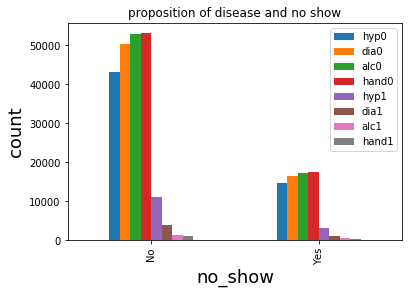

In [28]:
#plot
plot_graphs(df_disease, 'bar', 'no_show', 'count', 'proposition of disease and no show')


#### c. Lets take a look at gender and show up

There are more female patients compared to male in our dataset.

In [29]:
#getting counts of male and female
gender_age = df.groupby('gender').count()['age']
gender_age

gender
F    46466
M    25350
Name: age, dtype: int64

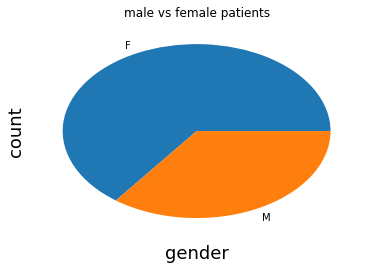

In [30]:
#visualizing gender counts
plot_graphs(gender_age, 'pie', 'gender', 'count', 'male vs female patients')


In [31]:
#value counts of showing up or not for the genders
male = df.query('gender == "M"')['no_show'].value_counts()
female = df.query('gender == "F"')['no_show'].value_counts()

In [32]:
#Making a dataframe for easy plotting
m_f = pd.DataFrame({'male': male, 'female': female})
m_f

,male,female
No,19193,34960
Yes,6157,11506


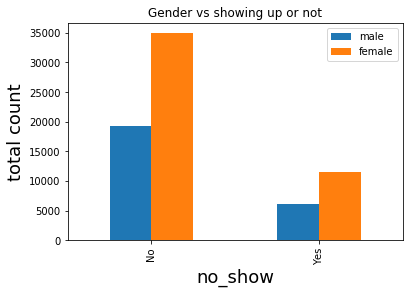

In [48]:
#plot
plot_graphs(m_f, 'bar', 'no_show', 'total count', 'Gender vs showing up or not')

#### d. How does the age affect no show?

In [34]:
#lets create different age groups to make analysis easier
age_groups = ['preteen', 'young_adult', 'middle_age', 'adult', 'senior']
edges = [0, 14, 29, 44, 74, 115]

In [35]:
# creates age_group column
df['age_group'] = pd.cut(df['age'], edges, labels=age_groups)

# confirm column has been created
df.head()

,gender,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,age_group
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No,adult
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No,adult
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No,adult
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,preteen
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No,adult


In [36]:
# we no longer need the age column
df.drop('age', axis=1, inplace=True)
df.head(1)

,gender,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,age_group
0,F,JARDIM DA PENHA,0,1,0,0,0,0,No,adult


Counts of people who showed up for their appointment per age grp

In [37]:
#getting total values of age group that showed up for appointment
show_yes = df.query('no_show =="No"')['age_group'].value_counts()
show_yes

adult          19184
preteen        10172
middle_age     10091
young_adult     9748
senior          3130
Name: age_group, dtype: int64

Counts of people who did not attend their appointment per age grp

In [38]:
#getting total values of age group that did not show up for appointment
show_no = df.query('no_show =="Yes"')['age_group'].value_counts()
show_no

adult          5209
young_adult    4043
middle_age     3696
preteen        3383
senior          759
Name: age_group, dtype: int64

Lets calculate the difference so that we can calculate the percentage

In [39]:
#difference
diff = show_yes - show_no

In [40]:
#sum totals of both who attended and did not
suum = show_yes + show_no
suum

preteen        13555
young_adult    13791
middle_age     13787
adult          24393
senior          3889
Name: age_group, dtype: int64

Percentage of each group. We can see that the seniors tend to report to their appointments

In [41]:
#calculate the percentages
percent = (diff / suum) * 100
percent

preteen        50.084840
young_adult    41.367559
middle_age     46.384275
adult          57.291026
senior         60.966830
Name: age_group, dtype: float64

Lets visualize

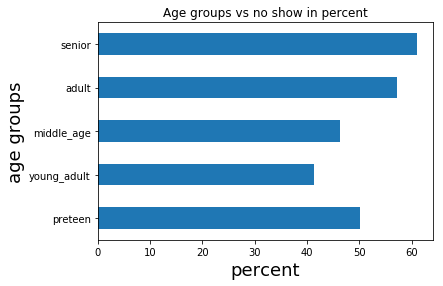

In [47]:
#lets call our plotting function
plot_graphs(percent, 'barh', 'percent', 'age groups', 'Age groups vs no show in percent')

#### e. What about neighbourhood and no show?

Jardim has the highest number of patients and many of them showed up for their appointment.

In [43]:
#showed up totals per neighbourhood
neigh_yes = df.query('no_show == "No"')['neighbourhood'].value_counts()

In [44]:
#did not show up totals per neighbourhood
neigh_no = df.query('no_show == "Yes"')['neighbourhood'].value_counts()

Lets visualize

Text(0.5,1,'Neighbourhood totals no_show no')

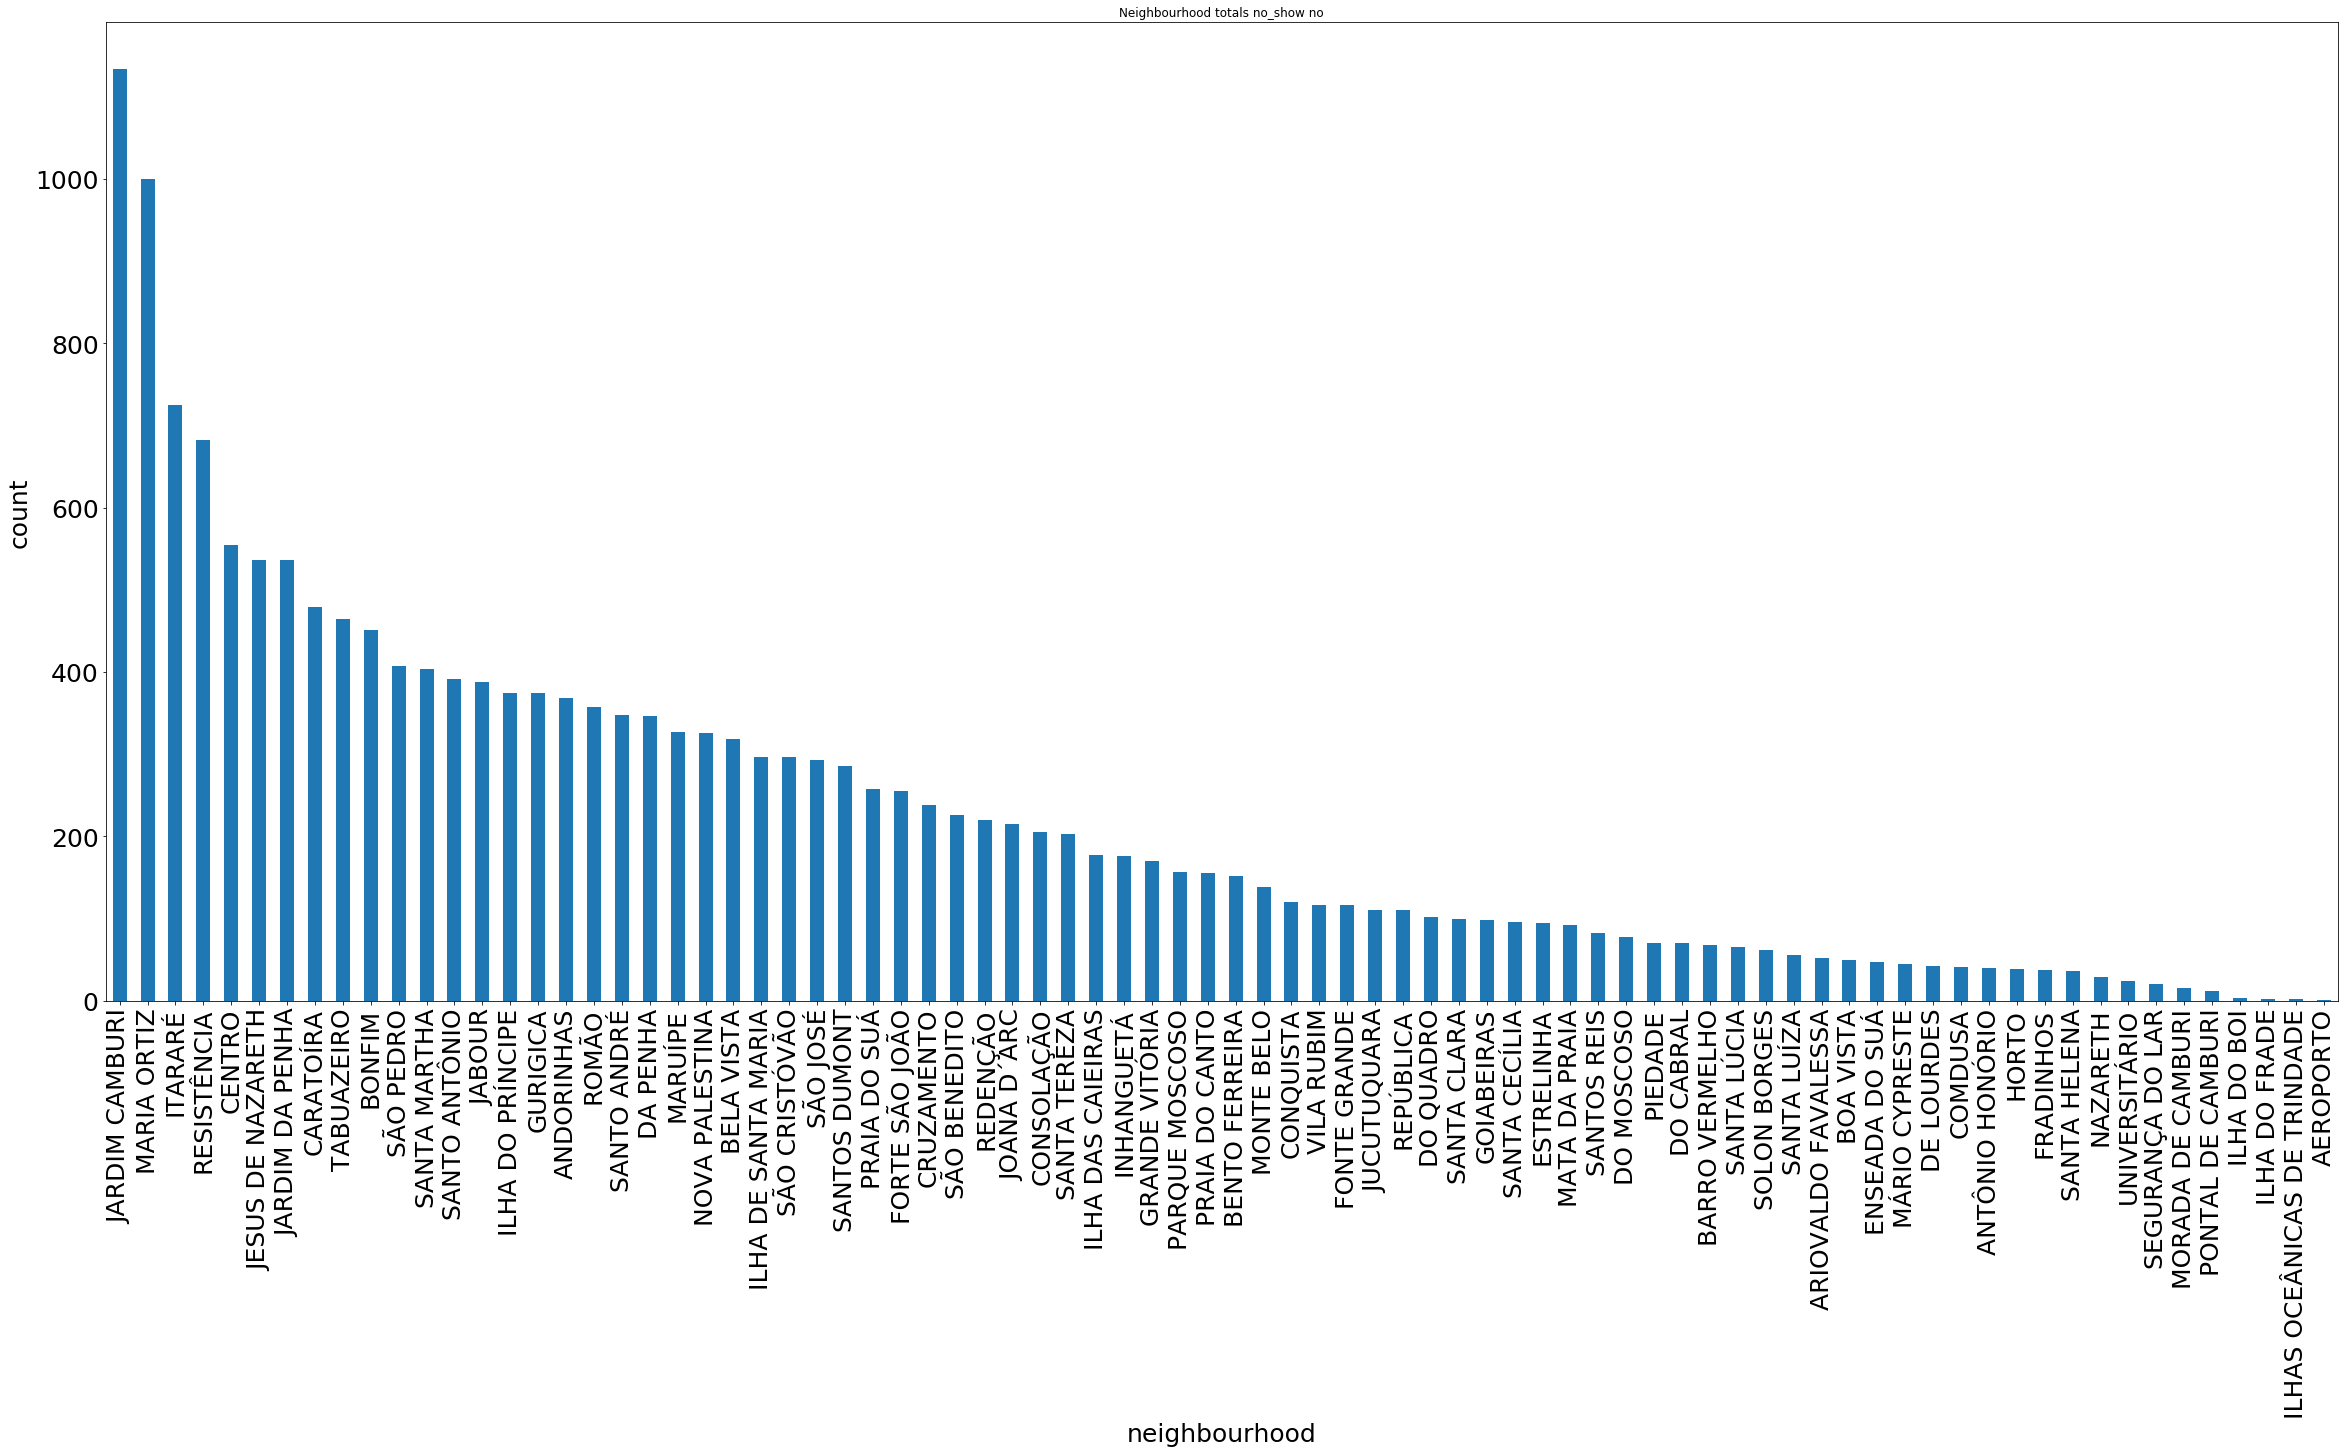

In [45]:
#plotting
neigh_no.plot(kind='bar', figsize=(40, 18), fontsize=25)
plt.xlabel('neighbourhood', fontsize=25)
plt.ylabel('count', fontsize=25)
plt.title('Neighbourhood totals no_show no')

Text(0,0.5,'count')

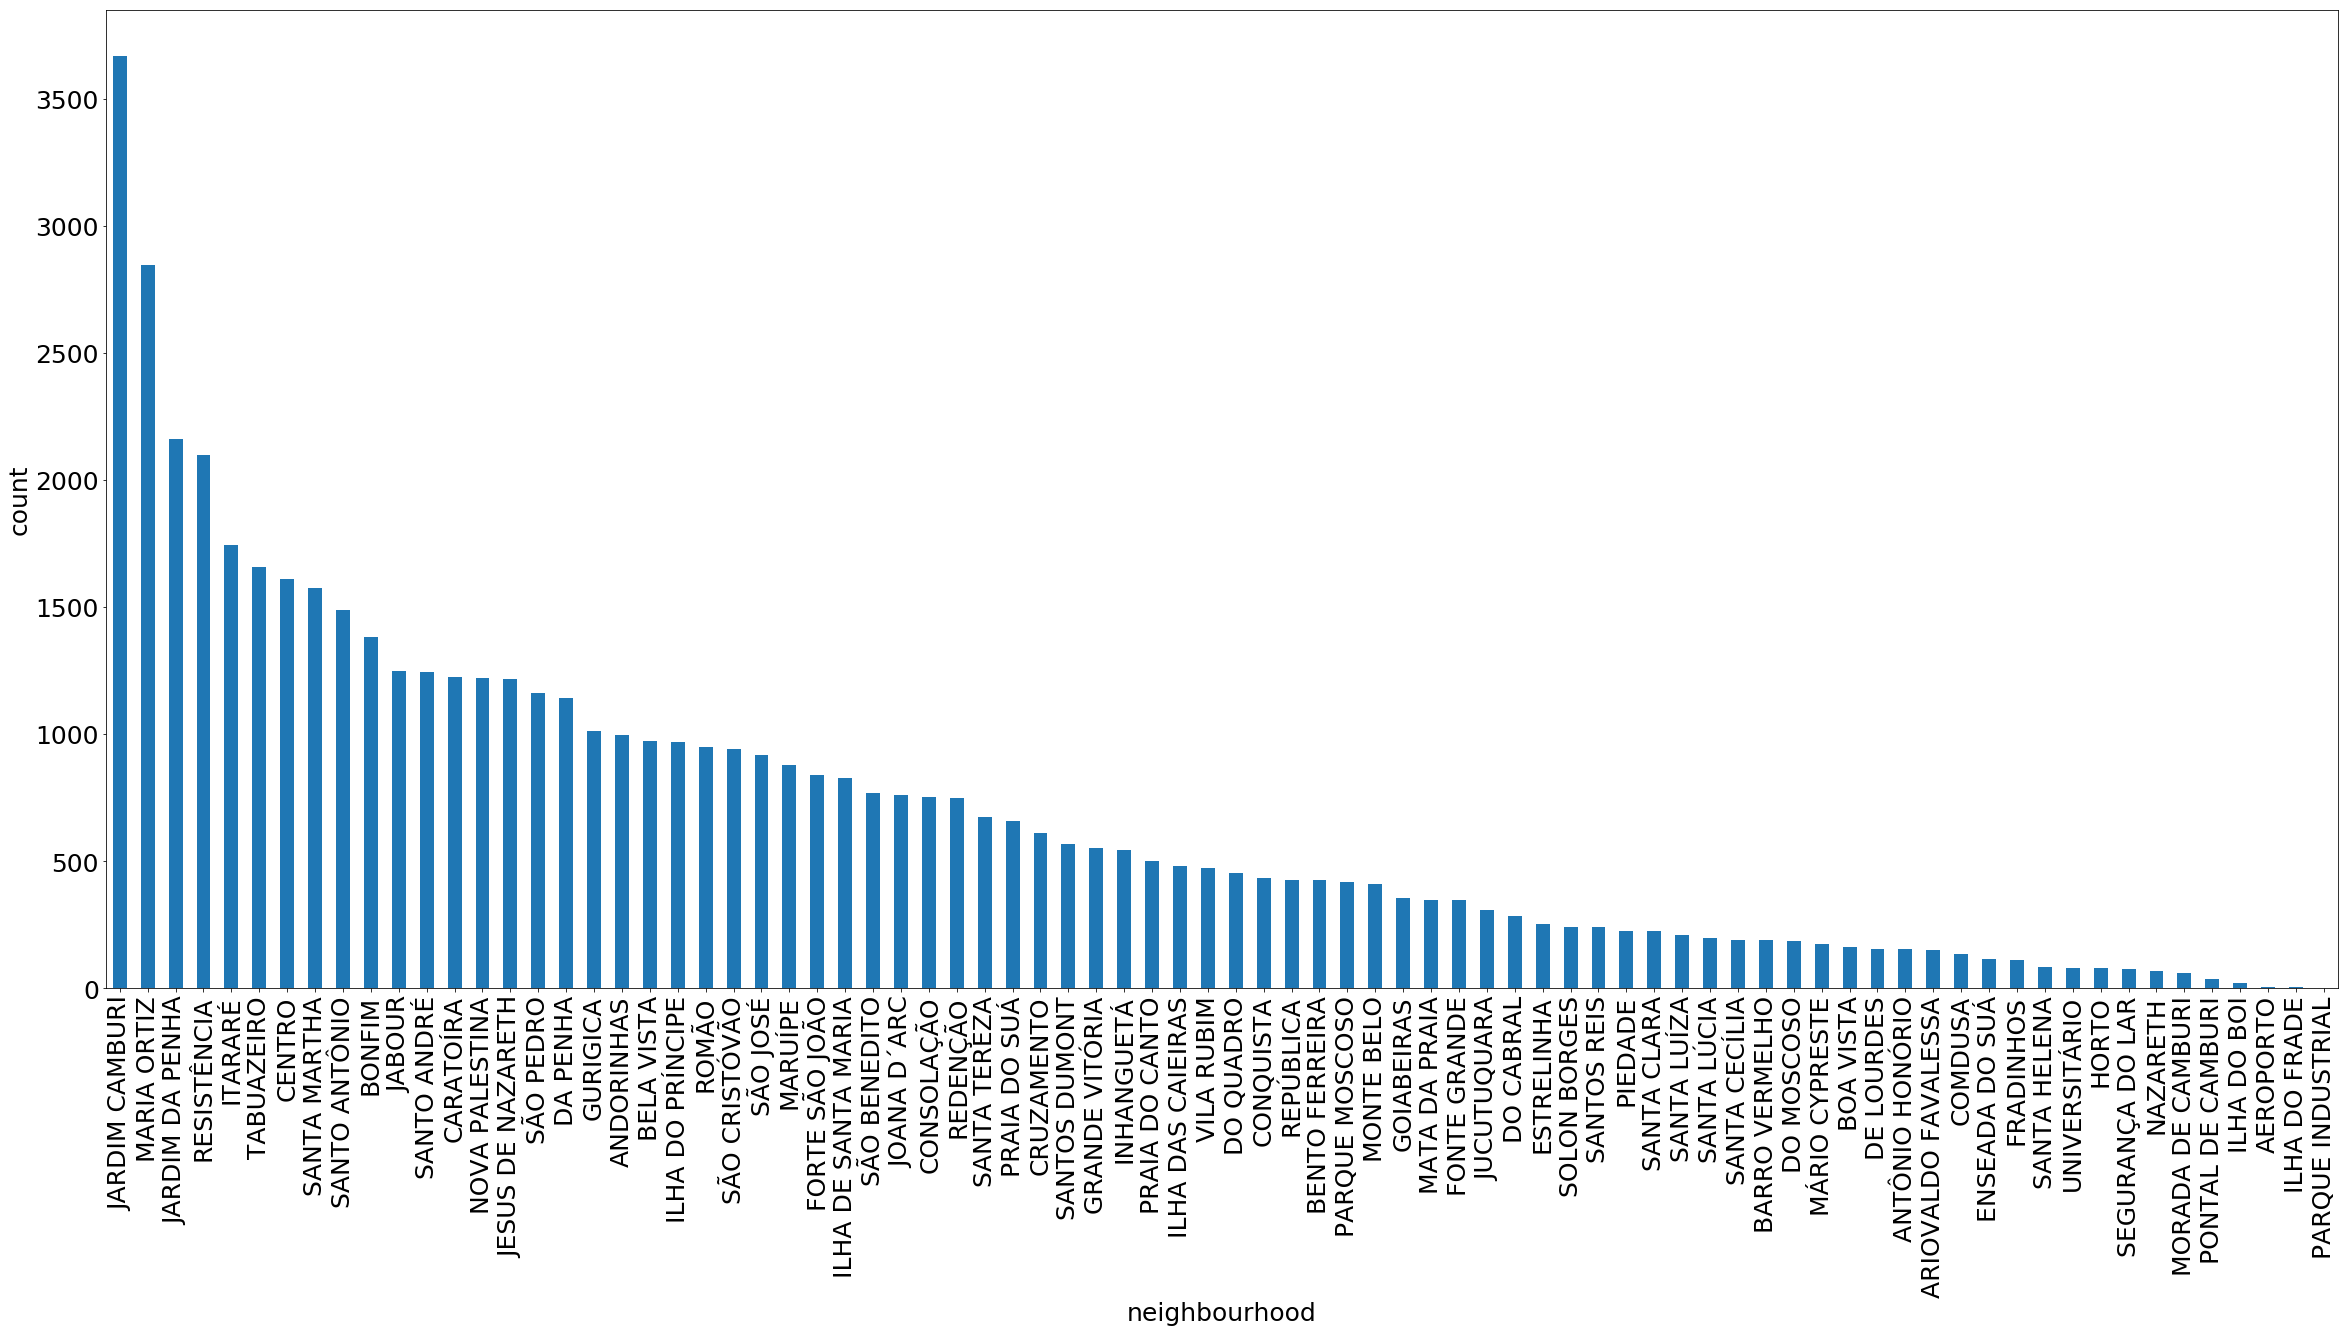

In [46]:
neigh_yes.plot(kind='bar', figsize=(40, 18), fontsize=25)
plt.xlabel('neighbourhood', fontsize=25)
plt.ylabel('count', fontsize=25)

<a id='conclusions'></a>
## Conclusions

> **Summary**: I have seen that female are likely to attend their appointments more than male. Scholarship does not affect appointment attendance in a great way. There are less people with disease (hypertension, diabetes, alcoholism, handicap) in the dataset. Senior adults are likely to maintain their appointments.

> **Limitation**: Having more female than male sampled is a limitation in the data collected


In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])